# Francisco, Leann Joy Y. (3CSD)

## ---Formative Lab Exercise #2.1---

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from IPython.display import display

### 1.Load the Data: Load the provided Student Performance data in your Jupyter Notebook.

In [5]:
# Load the dataset
df = pd.read_csv("Student_Performance.csv")

# Display
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
5,3,78,0,9,6,61
6,7,73,1,5,6,63
7,8,45,1,4,6,42
8,5,77,0,8,2,61
9,4,89,0,4,0,69


In [6]:
df.tail(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9990,9,43,0,7,4,40
9991,5,97,1,7,4,83
9992,9,52,0,9,7,50
9993,9,58,1,7,7,55
9994,6,46,1,8,0,39
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95
9999,7,74,0,8,1,64


### 2.Select a Unique Randomization Seed: Select a unique integer that will serve as the seed for your randomization.

In [8]:
random_seed = 50

### 3.Sample Train Data: Randomly sample a subset of the data using the seed you have selected; limit the sample to 30. Ensure that your sampled data is representative of the population.

In [10]:
train_data = df.sample(n=30, random_state=random_seed)

### 4.Weight Update Function: Build a weight update function following the Gradient Descent concept.

In [12]:
# PREPROCESSING
# Split the data into input features (X) and target variable (y)
X_train = train_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y_train = train_data['Performance Index'].values

In [13]:
# Apply appropriate scaling techniques to ensure the features are on a similar scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
# Initialize all necesarry variables for the weight update (weight, bias, learning rate, and iterations)
weights = np.zeros(X_train_scaled.shape[1] + 1) 
learning_rate = 0.01
iterations = 100

In [15]:
# Weight Update Function - Gradient Descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    weights_history = []  # To store weights at each iteration

    for i in range(iterations):
        # Adding the bias term (intercept) to X (input data)
        X_bias = np.c_[np.ones((X.shape[0], 1)), X_train_scaled]

        # Calculate the prediction using current weights
        predictions = X_bias.dot(weights)

        # Calculate the error (predictions - actual)
        errors = predictions - y

        # Calculate the gradient (derivative of the cost function)
        gradient = (1 / m) * X_bias.T.dot(errors)

        # Update the weights using gradient descent
        weights -= learning_rate * gradient
        
        # Append the weights at this iteration for later plotting
        weights_history.append(weights.copy())

    return weights, weights_history

In [16]:
# Apply gradient descent to optimize weights
final_weights, weights_history = gradient_descent(X_train_scaled, y_train, weights, learning_rate, iterations)

### 5.Display the Values of Weights: Print the values of weights at each iteration separated by individual cell.

In [18]:
# Step 1: Convert the weight history list into a pandas DataFrame
df_weights = pd.DataFrame(weights_history)

# Step 2: Rename columns
df_weights.columns = [f'Weight {i}' for i in range(df_weights.shape[1])]

# Step 3: Add an "Iteration" column as the first column
df_weights.insert(0, "Iteration", range(1, len(weights_history) + 1))

# Step 4: Display the DataFrame without the index
display(df_weights.style.hide())

Iteration,Weight 0,Weight 1,Weight 2,Weight 3,Weight 4,Weight 5
1,0.533000,0.057516,0.184187,0.019243,-0.006419,0.008602
2,1.060670,0.114579,0.366540,0.038015,-0.012642,0.017087
3,1.583063,0.171194,0.547077,0.056324,-0.018673,0.025456
4,2.100233,0.227363,0.725817,0.074179,-0.024516,0.033709
5,2.612230,0.283090,0.902779,0.091586,-0.030174,0.041848
6,3.119108,0.338378,1.077981,0.108554,-0.035651,0.049874
7,3.620917,0.393229,1.251440,0.125091,-0.040951,0.057787
8,4.117708,0.447647,1.423175,0.141203,-0.046078,0.065590
9,4.609531,0.501636,1.593204,0.156897,-0.051033,0.073283
10,5.096435,0.555197,1.761543,0.172182,-0.055822,0.080867


### 6.Plot the Value of Weights: Display a line chart showing the variation of weight values per iteration. Per each weight, show an individual line chart of values against iteration.

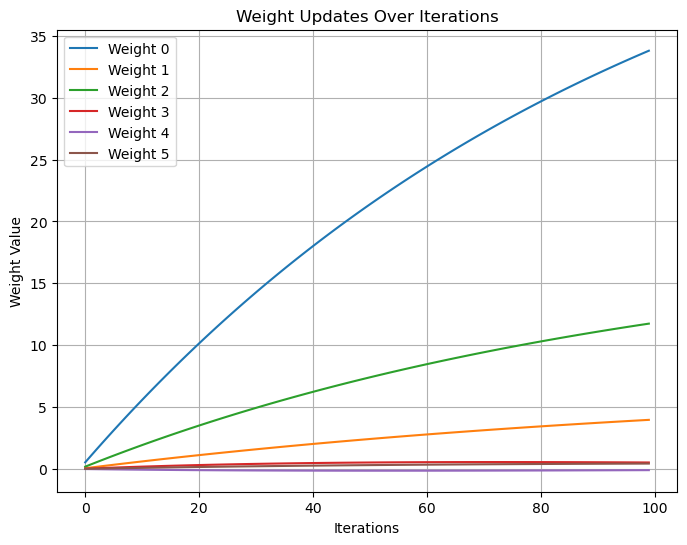

In [20]:
# Plot weight updates over iterations
weights_history = np.array(weights_history)
plt.figure(figsize=(8, 6)) 
for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f'Weight {i}')

plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.title('Weight Updates Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

### 7.Build a Function for the Final Regression Model: Create a function using the final regression model after all your iterations. Display the mathematical expression with all the final weights values multiplied by the input variables.

In [22]:
# Build the Final Regression Model (function to predict)
def predict(X, weights):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X_bias.dot(weights)

In [51]:
# Display the final linear regression equation
equation = f"y = {final_weights[0]:.2f}"  # Bias term (w0)

# Iterate through feature weights (excluding bias)
for i in range(1, len(final_weights)):
    equation += f" + ({final_weights[i]:.2f} * X{i})"

print("---Final Regression Model---\n")
print(equation)

---Final Regression Model---

y = 33.79 + (3.97 * X1) + (11.74 * X2) + (0.52 * X3) + (-0.10 * X4) + (0.43 * X5)


### 8.Sample Test Data: From the remainder of the original dataset, randomly sample another set of 30 observations NOT present in your training sample.

In [25]:
# Sample Test Data: Randomly sample another set of 30 data points not present in the training data
test_data = df.drop(train_data.index).sample(n=30, random_state=random_seed)

In [26]:
# Split test data into input features (X) and target variable (y)
X_test = test_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y_test = test_data['Performance Index'].values

In [27]:
#Normalize
X_test = scaler.transform(X_test)

### 9.Use the Regression Function for Prediction: Use your built linear regression function to predict for the Target Variable in your test set.

In [29]:
# Use the trained linear regression model to make predictions
y_pred = predict(X_test, final_weights)

### 10.Calculate for Errors: Calculate for the overall error between your model’s prediction and the actual values in the test set.

In [31]:
# Calculate the error (Mean Absolute Error)
error = np.mean(np.abs(y_pred - y_test))
print(f'Mean Absolute Error: {error}')

Mean Absolute Error: 18.583355546767795
